 # Wine Quality Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
wine_df = pd.read_csv('winequality-red.csv')

In [4]:
wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# checking for missing values
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data Analysis and Visulaization

In [6]:
# statistical measures of the dataset
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# number of values for each quality
Overall, this code is useful for visualizing the distribution of the quality variable in the wine_df dataframe.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


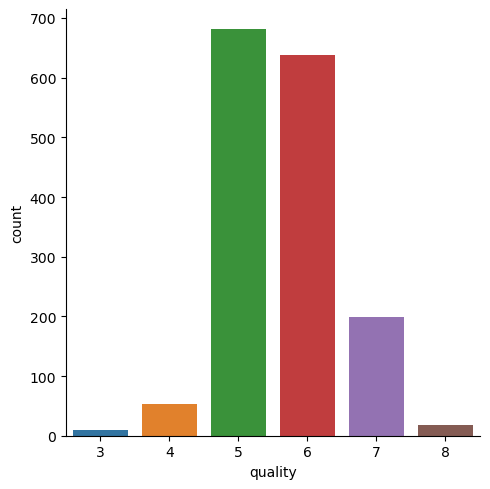

In [7]:
sns.catplot(x='quality',data=wine_df,kind='count')

# volatile acidity vs Quality

<Axes: xlabel='quality', ylabel='volatile acidity'>

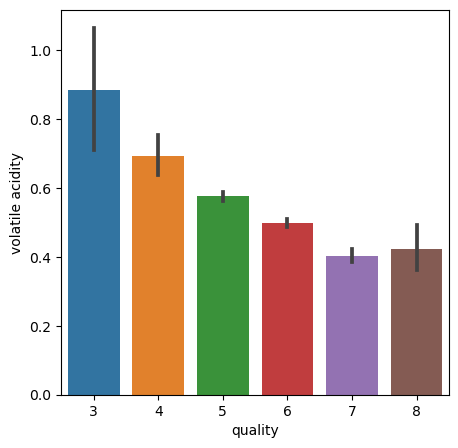

In [8]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_df)

# citric acid vs Quality

<Axes: xlabel='quality', ylabel='citric acid'>

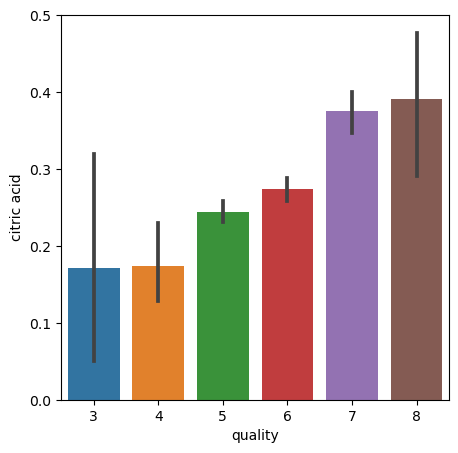

In [9]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_df)

<Axes: xlabel='quality', ylabel='residual sugar'>

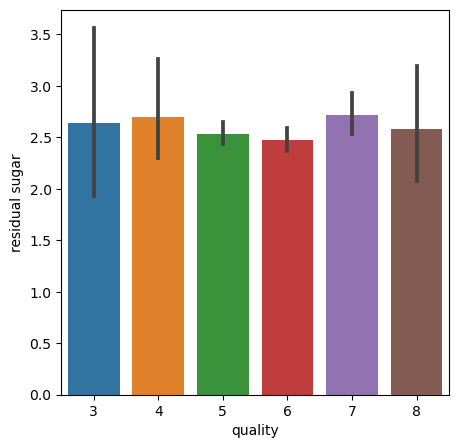

In [10]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'residual sugar', data = wine_df)

<Axes: xlabel='quality', ylabel='chlorides'>

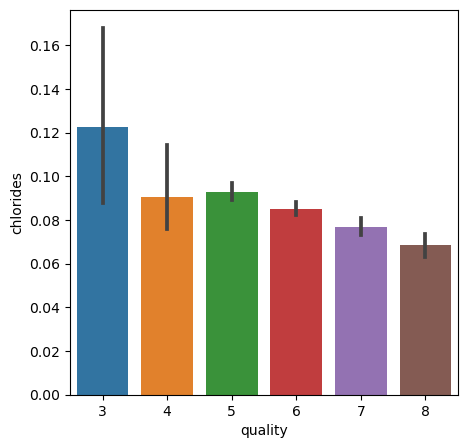

In [11]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'chlorides', data = wine_df)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

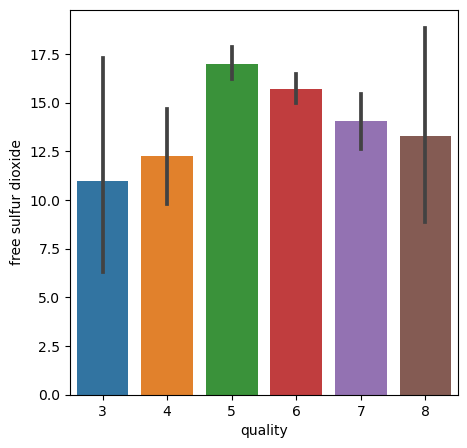

In [12]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'free sulfur dioxide', data = wine_df)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

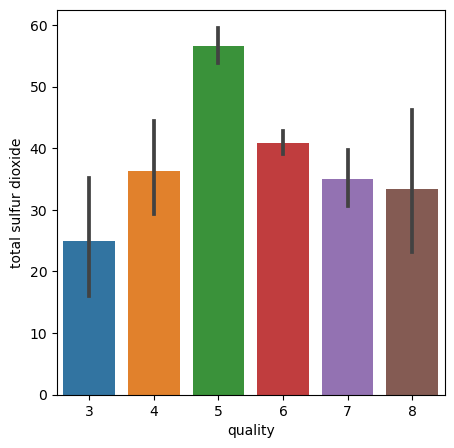

In [13]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'total sulfur dioxide', data = wine_df)

<Axes: xlabel='quality', ylabel='density'>

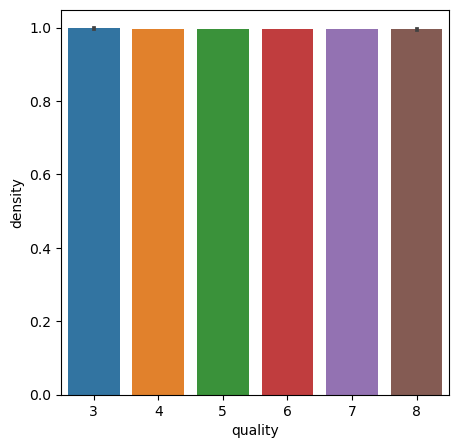

In [14]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'density', data = wine_df)

<Axes: xlabel='quality', ylabel='pH'>

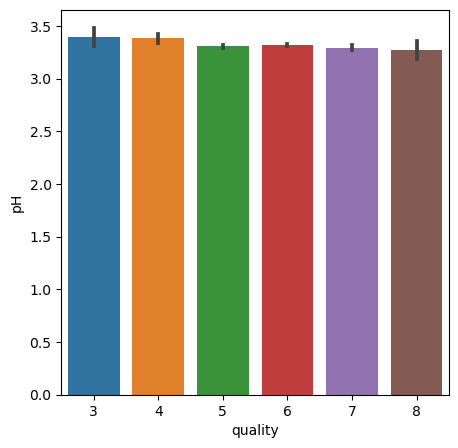

In [15]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'pH', data = wine_df)

<Axes: xlabel='quality', ylabel='sulphates'>

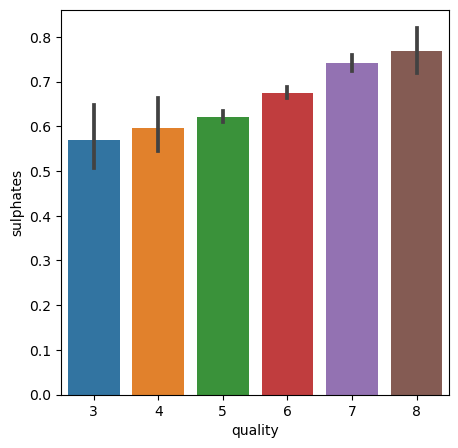

In [16]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'sulphates', data = wine_df)

<Axes: xlabel='quality', ylabel='alcohol'>

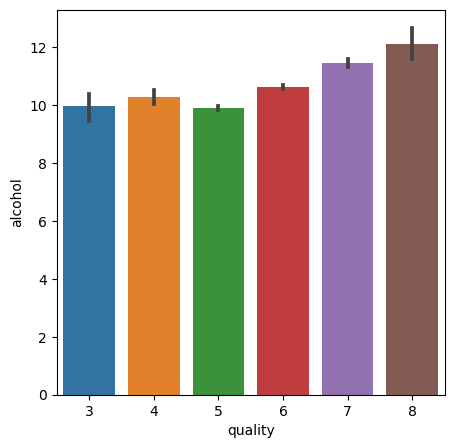

In [17]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'alcohol', data = wine_df)

In [18]:
correlation = wine_df.corr()

# constructing a heatmap to understand the correlation between the columns



<Axes: >

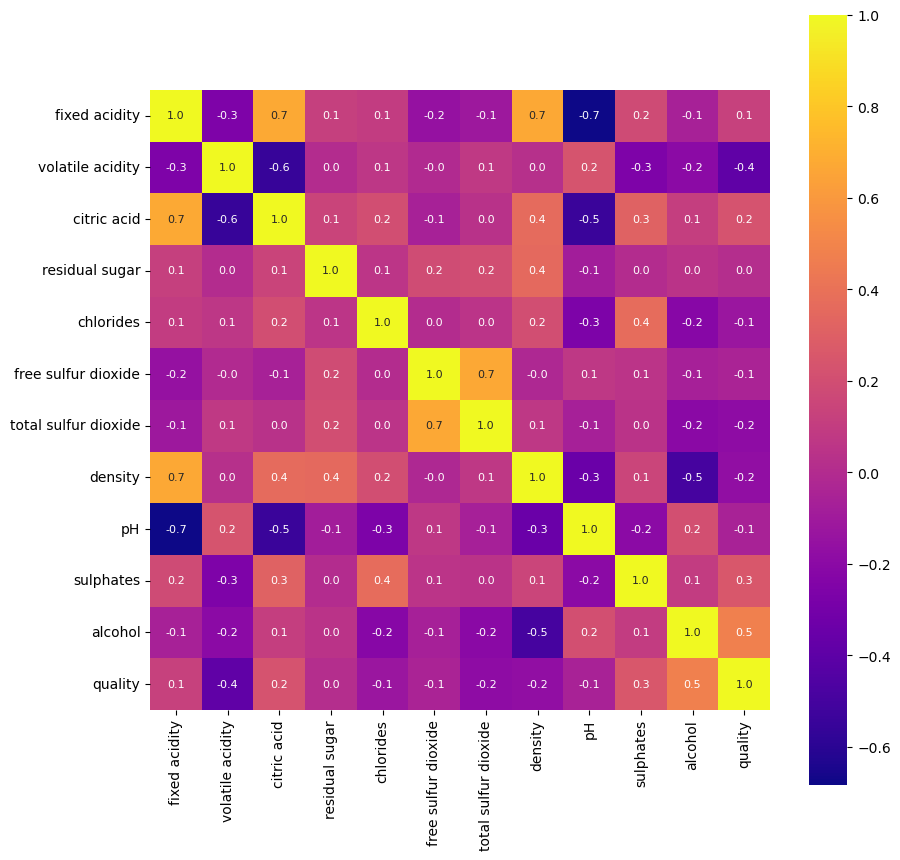

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,square=True,fmt=".1f",annot_kws={"size":8},cmap='plasma')

# separate the data and Label

In [20]:
X = wine_df.drop('quality',axis=1)

In [21]:
y = wine_df['quality'].apply(lambda yval:1 if yval>=7 else 0)

In [22]:
y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

# Train & Test Split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
print(y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [26]:
model = RandomForestClassifier(n_estimators = 100,random_state=30,min_samples_split = 2 )
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=30)

# Model Evaluation

Accuracy Score

In [27]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
print(accuracy_score(X_test_prediction, Y_test))

0.90625


In [28]:
print(classification_report(Y_test,X_test_prediction))
rfc_classification_report = classification_report(Y_test,X_test_prediction, zero_division=0, output_dict=True)
conf_matrix_rf = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix:\n", conf_matrix_rf)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       272
           1       0.78      0.52      0.62        48

    accuracy                           0.91       320
   macro avg       0.85      0.75      0.79       320
weighted avg       0.90      0.91      0.90       320

Confusion Matrix:
 [[265   7]
 [ 23  25]]


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors= 20)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=20)

In [30]:
y_prediction = knn.predict(X_test)

In [31]:
print(accuracy_score(Y_test, y_prediction))

0.86875


In [32]:
knn_classification_report = classification_report(Y_test, y_prediction, zero_division=0, output_dict=True)
print(classification_report(Y_test,y_prediction))
conf_matrix_rf = confusion_matrix(Y_test, y_prediction)
print("Confusion Matrix:\n", conf_matrix_rf)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       272
           1       0.64      0.29      0.40        48

    accuracy                           0.87       320
   macro avg       0.76      0.63      0.66       320
weighted avg       0.85      0.87      0.85       320

Confusion Matrix:
 [[264   8]
 [ 34  14]]


In [33]:
class SVM_classifier():


  # initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter


  
  # fitting the dataset to SVM Classifier
  def fit(self, X, Y):

    # m  --> number of Data points --> number of rows
    # n  --> number of input features --> number of columns
    self.m, self.n = X.shape

    # initiating the weight value and bias value

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization

    for i in range(self.no_of_iterations):
      self.update_weights()



  # function for updating the weight and bias value
  def update_weights(self):

    # label encoding
    y_label = np.where(self.Y <= 0, -1, 1)



    # gradients ( dw, db)
    for index, x_i in enumerate(self.X):

      condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1

      if (condition == True):

        dw = 2 * self.lambda_parameter * self.w
        db = 0

      else:

        dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
        db = y_label[index]


      self.w = self.w - self.learning_rate * dw

      self.b = self.b - self.learning_rate * db



  # predict the label for a given input value
  def predict(self, X):

    output = np.dot(X, self.w) - self.b
    
    predicted_labels = np.sign(output)

    y_hat = np.where(predicted_labels <= -1, 0, 1)

    return y_hat 

 

    
    
        
        
        

In [34]:
classifier = SVM_classifier(learning_rate=0.01, no_of_iterations=1000, lambda_parameter=0.01)

In [35]:
classifier.fit(X_train, Y_train)

In [36]:
y_predict = classifier.predict(X_test)

In [37]:
svm_accuracy = accuracy_score(Y_test, y_predict)

In [38]:
print(f"Classification Report: \n{classification_report(Y_test, y_predict, zero_division=0)}")
svm_classification_report = classification_report(Y_test, y_predict, zero_division=0, output_dict=True)
conf_matrix_rf = confusion_matrix(Y_test, y_predict)
print("Confusion Matrix:\n", conf_matrix_rf)


Classification Report: 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       272
           1       0.00      0.00      0.00        48

    accuracy                           0.85       320
   macro avg       0.42      0.50      0.46       320
weighted avg       0.72      0.85      0.78       320

Confusion Matrix:
 [[272   0]
 [ 48   0]]


In [39]:
# Create DataFrames for classification reports
svm_df = pd.DataFrame(svm_classification_report).transpose()
rfc_df = pd.DataFrame(rfc_classification_report).transpose()
knn_df = pd.DataFrame(knn_classification_report).transpose()

# Display the classification reports in a single table
classifiers_reports = pd.concat({'SVM': svm_df, 'Random Forest': rfc_df, 'KNN': knn_df}, axis=1)
classifiers_reports.columns = pd.MultiIndex.from_product([['SVM', 'Random Forest', 'KNN'], svm_df.columns])

# Display the table
classifiers_reports

SVM                          Random Forest            \
             precision recall  f1-score support     precision    recall   
0               0.8500   1.00  0.918919  272.00      0.920139  0.974265   
1               0.0000   0.00  0.000000   48.00      0.781250  0.520833   
accuracy        0.8500   0.85  0.850000    0.85      0.906250  0.906250   
macro avg       0.4250   0.50  0.459459  320.00      0.850694  0.747549   
weighted avg    0.7225   0.85  0.781081  320.00      0.899306  0.906250   

                                        KNN                                 
              f1-score    support precision    recall  f1-score    support  
0             0.946429  272.00000  0.885906  0.970588  0.926316  272.00000  
1             0.625000   48.00000  0.636364  0.291667  0.400000   48.00000  
accuracy      0.906250    0.90625  0.868750  0.868750  0.868750    0.86875  
macro avg     0.785714  320.00000  0.761135  0.631127  0.663158  320.00000  
weighted avg  0.898214  320.00000  0.848475  0.868750  0.847368  320.00000

In [40]:
"""Save the Model with the Highest Accuracy using pickle"""

import pickle
pickle.dump(model, open('model.pkl', 'wb')) #svm has the highest accuracy

pickle.dump(scaler, open('scaler.pkl', 'wb')) #save the std scaler too

# Building a Predictive System

In [41]:
input_data =(6.6,0.815,0.02,2.7,0.07200000000000001,17.0,34.0,0.9955,3.58,0.89,12.3)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('Bad quality wine')
else:
  print('Good quality wine')

[[-0.99238052  1.60460089 -1.29357267  0.09602999 -0.31410794  0.10934498
  -0.38271796 -0.66517788  1.7237513   1.37243155  1.77152006]]
[1]
Good quality wine


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)